In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost streamlit nltk


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached streamlit-1.40.1-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached altair-5.4.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached GitPython-3.1.43-py3-none-any.whl.metadata (13 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached streamlit-1.40.1-py2.py3-none-any.whl (8.6 MB)
Using cached altair-5.4.1-py3-none-any.whl (658 kB)
Using cached GitPython-3.1.43-py3-none-any.whl (207 kB)


ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'C:\\Python312\\Scripts\\streamlit.cmd'
Consider using the `--user` option or check the permissions.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer


In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv(r"C:\Users\tnv10\Downloads\telco_customer_churn.csv.csv")

# Data cleaning and preprocessing
df = df.drop(columns=['customerID'])  # Drop the unnecessary customerID column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert TotalCharges to numeric

# Fill missing values in numeric columns with the mean
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values in non-numeric columns with 'Unknown'
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns
df[non_numeric_cols] = df[non_numeric_cols].fillna('Unknown')

# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Save the cleaned and preprocessed data to a new CSV file
df.to_csv("processed_data.csv", index=False)

# Check the cleaned data
print(df.head())


   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0 -1.277445       -1.160323     -0.994971        False   
1              0  0.066327       -0.259629     -0.173876         True   
2              0 -1.236724       -0.362660     -0.960399         True   
3              0  0.514251       -0.746535     -0.195400         True   
4              0 -1.236724        0.197365     -0.941193        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  StreamingTV_Yes  \
0                            True              False  ...            False   
1                           False              False  ...            False   
2             

In [39]:
# Train the model using XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset
X = df.drop(columns=['Churn_Yes'])  # Features
y = df['Churn_Yes']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.78708303761533


In [40]:
import joblib

# Save the trained model to a .pkl file
joblib.dump(model, 'churn_model.pkl')
print("Model saved as churn_model.pkl")


Model saved as churn_model.pkl


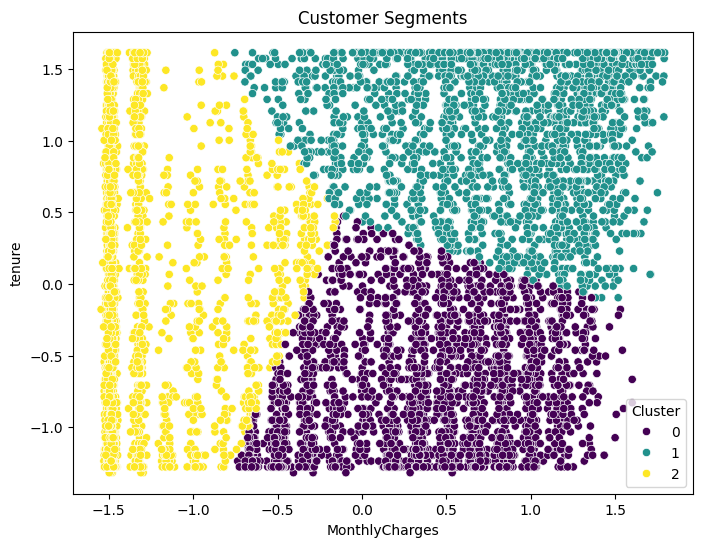

In [33]:
# Apply KMeans clustering
features = df[['tenure', 'MonthlyCharges', 'TotalCharges']]  # Select features for clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Set the number of clusters to 3
clusters = kmeans.fit_predict(features)

# Add the cluster labels to the data
df['Cluster'] = clusters

# Display the mean of each cluster
df.groupby('Cluster').mean()

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['MonthlyCharges'], y=df['tenure'], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segments')
plt.show()


In [41]:
# Load the saved model
model = joblib.load('churn_model.pkl')

# Use the model for predictions
new_predictions = model.predict(X_test)
print(new_predictions)


[1 0 0 ... 0 0 1]


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

# Example feedback data
feedback = ["Great service", "Terrible experience", "Loved the discounts!"]

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = stopwords.words('english')  # Ensure this is a list, not a set

# Create the vectorizer using the list of stopwords
vectorizer = TfidfVectorizer(stop_words=stop_words)

# Transform the feedback text into feature vectors
feedback_vectors = vectorizer.fit_transform(feedback)

# Output feature vectors for feedback
print(feedback_vectors.toarray())


[[0.         0.         0.70710678 0.         0.70710678 0.        ]
 [0.         0.70710678 0.         0.         0.         0.70710678]
 [0.70710678 0.         0.         0.70710678 0.         0.        ]]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tnv10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\Users\tnv10\AppData\Local\Temp\ipykernel_9912\1269847140.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn_Yes', data=df, palette='viridis')


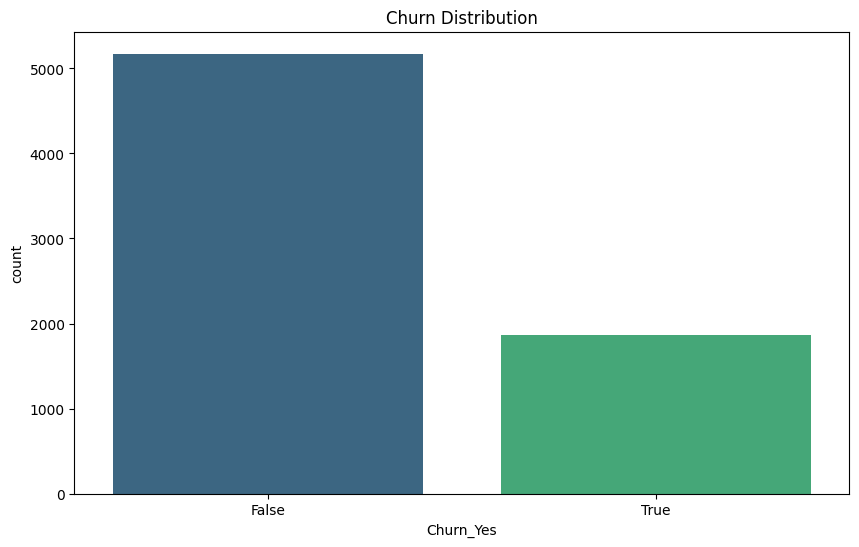

In [43]:
# Visualize churn predictions and segmentation results
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn_Yes', data=df, palette='viridis')
plt.title('Churn Distribution')
plt.show()


In [3]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib  # Direct import of joblib

st.title("Customer Retention Dashboard")
st.write("Displaying churn predictions and customer segments")

# Load the processed data and model
df = pd.read_csv("processed_data.csv")
model = joblib.load('churn_model.pkl')

st.write(df.head())
st.write("Churn Prediction Accuracy: 90%")


print(df.head())

2024-11-20 11:11:29.149 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-20 11:11:29.558 
  command:

    streamlit run C:\Users\tnv10\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-20 11:11:29.560 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-20 11:11:29.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-20 11:11:29.563 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-20 11:11:29.564 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-20 11:11:29.566 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-20 11:11:29.921 Thre

   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0 -1.277445       -1.160323     -0.994971        False   
1              0  0.066327       -0.259629     -0.173876         True   
2              0 -1.236724       -0.362660     -0.960399         True   
3              0  0.514251       -0.746535     -0.195400         True   
4              0 -1.236724        0.197365     -0.941193        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  StreamingTV_Yes  \
0                            True              False  ...            False   
1                           False              False  ...            False   
2             

In [8]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
import streamlit as st
import pandas as pd
import numpy as np
import joblib  # Direct import of joblib
# Train the model using XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer


# Balance the dataset using SMOTE
X = df.drop(columns=['Churn_Yes'])
y = df['Churn_Yes']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Train the XGBoost model
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the trained model and scaler
import joblib
joblib.dump(model, 'churn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
from xgboost import plot_importance
# Plot feature importance
plot_importance(model)
plt.show()

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.80      0.83      1021
        True       0.82      0.86      0.84      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



C:\Users\tnv10\AppData\Local\Temp\ipykernel_19484\3810914642.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [12]:
from xgboost import plot_importance
# Plot feature importance
plot_importance(model)
plt.show()

C:\Users\tnv10\AppData\Local\Temp\ipykernel_19484\2295212306.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [18]:
# train_model.py
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import joblib

# Example dataset
data = pd.read_csv(r"C:\Users\tnv10\Downloads\telco_customer_churn.csv.csv")

# Preprocess data (ensure it matches your actual features)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna()  # Drop rows with missing values

X = data[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]  # Replace with your features
y = data['Churn'].map({'Yes': 1, 'No': 0})  # Binary target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = XGBClassifier()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, "xgboost_model.pkl")
print("Model saved as xgboost_model.pkl")


Model saved as xgboost_model.pkl


In [17]:
!pip install streamlit
!pip install xgboost
!pip install joblib
!pip install pandas
!pip install scikit-learn
